## Reducing dimensionality and clustering

In [36]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### Load and process 2D arrays

In [37]:
class patient:
    def __init__(self, patient_id, name, array):
        self.id = patient_id
        self.name = name
        self.array = array
        self.cluster = None
        self.response = None

In [3]:
# Define the folder containing the CSV files
input_folder = '../output/raw'
arrays = []
count=0
patients = []
for filename in os.listdir(input_folder):
    if filename.endswith('.csv'):
        if 'S1' in filename:
            filepath = os.path.join(input_folder, filename)
            array = np.loadtxt(filepath, delimiter=',')
            arrays.append(array)
            name = filename[:4]
            patients.append(patient(patient_id=count, name=name, array=array))
            count += 1

In [4]:
# print all attributes of the first patient
print("Patient ID:", patients[0].id)
print("Patient Name:", patients[0].name)
print("Patient Array:", patients[0].array.dtype)

Patient ID: 0
Patient Name: DD01
Patient Array: float64


In [35]:
print([p.name for p in patients])

['DD01', 'DD02', 'DD03', 'DD04', 'DD05', 'DD06', 'DD07', 'DD08', 'DD09', 'DD11', 'DD12', 'DD13', 'DD14', 'DD15', 'DD16', 'DD17', 'DD18', 'DD19', 'DD20', 'DD21', 'DD22', 'DD23', 'DD24', 'DD25', 'DD26', 'DD27', 'DD28', 'DD29', 'DD30', 'DD31', 'DD32', 'DD33', 'DD34', 'DD35', 'DD36', 'DD37', 'DD38', 'DD39', 'DD40', 'DD41', 'DD42', 'DD43', 'DD44', 'DD45', 'DD46', 'DD47', 'DD48', 'DD49', 'DD50', 'DD51', 'DD52', 'DD53']


### Flatten and reduce dimensionality

In [5]:
# Flatten each 2D array into a 1D array
flattened_arrays = [array.flatten() for array in arrays]

# Reduce dimensionality using PCA
pca = PCA()  # Adjust the number of components as needed
reduced_data = pca.fit_transform(flattened_arrays)
len(reduced_data[0])

52

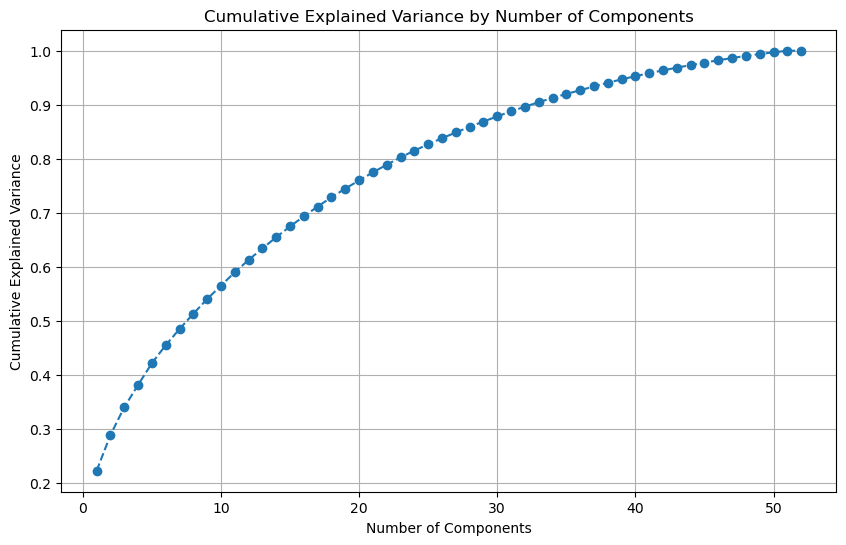

In [6]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [7]:
# Set a threshold (e.g., 95%)
threshold = 0.95

# Find the number of components
num_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Number of components to retain {threshold*100}% variance: {num_components}")

Number of components to retain 95.0% variance: 40


In [8]:
pca = PCA(n_components=num_components)  # Adjust the number of components as needed
reduced_data = pca.fit_transform(flattened_arrays)

### Clustering with k-means

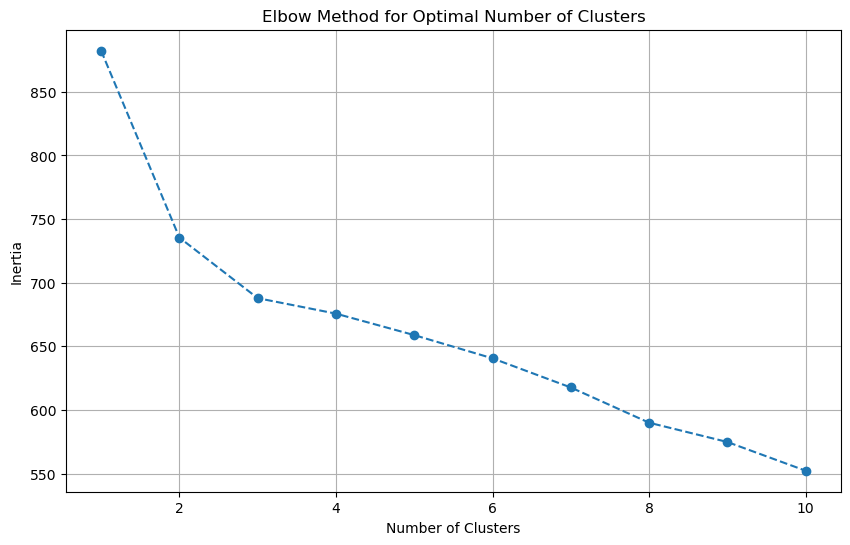

In [19]:
# Use the Elbow Method to find the optimal number of clusters
inertia = []
cluster_range = range(1, 11)  # Test cluster sizes from 1 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [20]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

In [39]:
#add cluster to each patient in patient_index
for pat in patients:
    pat.cluster = clusters[pat.id]

for pat in patients[:10]: print(f"Patient {pat.name} is in cluster {pat.cluster}")

Patient DD01 is in cluster 0
Patient DD02 is in cluster 0
Patient DD03 is in cluster 2
Patient DD04 is in cluster 1
Patient DD05 is in cluster 1
Patient DD06 is in cluster 0
Patient DD07 is in cluster 1
Patient DD08 is in cluster 0
Patient DD09 is in cluster 2
Patient DD11 is in cluster 1


### Mapping of patients - visualization with TSNE

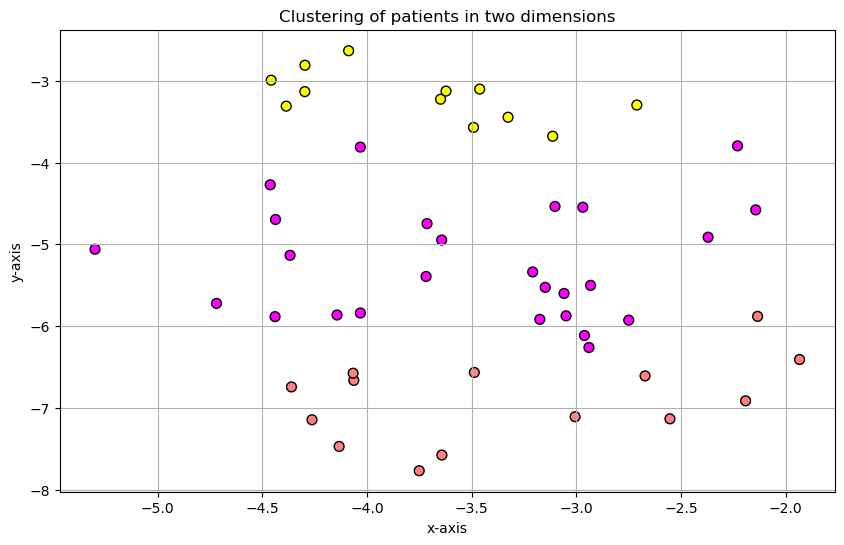

In [22]:
# Reduce dimensionality using TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
flattened_ndarray = np.array(reduced_data)
reduced_data_tsne = tsne.fit_transform(flattened_ndarray)
# Plot the reduced data
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=clusters, cmap='spring', marker='o', edgecolor='k', s=50)
plt.title('Clustering of patients in two dimensions')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.show()

### Predicting Treatment response based on clustering

In [41]:
# convert csv file to pandas dataFrame
file_path = '../datasets/antidepressant-study/DD_Demographics.csv'
df = pd.read_csv(file_path)

df[['ID', 'Responders']]

,ID,Responders
0,DD01,Non-responders
1,DD02,Responders
2,DD03,Responders
3,DD04,Non-responders
4,DD05,Non-responders
5,DD06,Responders
6,DD07,Responders
7,DD08,Responders
8,DD09,Non-responders
9,DD10,Responders


In [24]:
for patient in patients:
    # Find the row in the DataFrame that matches the patient's name
    row = df[df['ID'] == patient.name]
    if not row.empty:
        responder = row.iloc[0]['Responders']
        if responder == 'Responders': patient.response = True
        elif responder == 'Non-responders': patient.response = False
        else: patient.response = None, print(f"Unknown response for patient {patient.name}: {responder}")
    else:
        print(f"Patient {patient.name} not found in DataFrame.")

Unknown response for patient DD19: nan
Unknown response for patient DD23: nan


All patients but `DD19` and `DD23` have a treatment response recorded. Patients `DD45` and `DD53`are missing the second recording. The first recording of patient `DD10` is corrupted.

In [42]:
# create a copy of patients list without DD19 and DD23
patients_resp = [p for p in patients if p.name not in ['DD19', 'DD23']]

In [45]:
print([p.name for p in patients_resp])
print(f"Number of patients for prediction: {len(patients_resp)}")

['DD01', 'DD02', 'DD03', 'DD04', 'DD05', 'DD06', 'DD07', 'DD08', 'DD09', 'DD11', 'DD12', 'DD13', 'DD14', 'DD15', 'DD16', 'DD17', 'DD18', 'DD20', 'DD21', 'DD22', 'DD24', 'DD25', 'DD26', 'DD27', 'DD28', 'DD29', 'DD30', 'DD31', 'DD32', 'DD33', 'DD34', 'DD35', 'DD36', 'DD37', 'DD38', 'DD39', 'DD40', 'DD41', 'DD42', 'DD43', 'DD44', 'DD45', 'DD46', 'DD47', 'DD48', 'DD49', 'DD50', 'DD51', 'DD52', 'DD53']
Number of patients for prediction: 50


## Testing Predictive Ability of Clusters on Treatment Response

### Clusters + DMD arrays as features


Baseline Accuracy (Majority Class): 0.52
Model Accuracy: 0.60

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.33      0.50         9
        True       0.50      1.00      0.67         6

    accuracy                           0.60        15
   macro avg       0.75      0.67      0.58        15
weighted avg       0.80      0.60      0.57        15



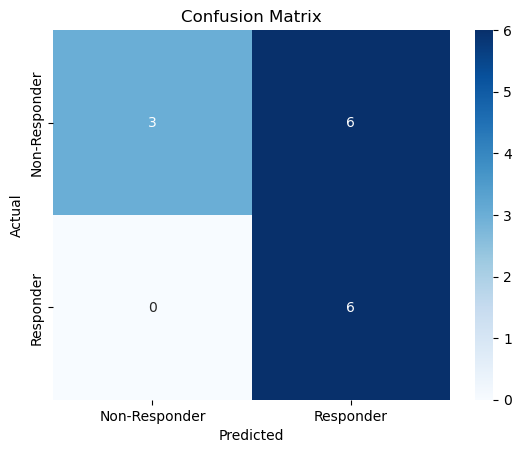

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Prepare the data
# Cluster labels as features
cluster_df = pd.DataFrame({
        'clusters': [pat.cluster for pat in patients_resp]
    })

cluster_encoded = pd.get_dummies(cluster_df, columns=['clusters'])  # One-hot encoding for categorical features
X_baseline = pd.DataFrame([pat.array.flatten() for pat in patients_resp])  # Flattened EEG data
X = pd.concat([cluster_encoded, X_baseline], axis=1) # Combine features
X.columns = X.columns.astype(str) # Convert column names to string

y = np.array([pat.response for pat in patients_resp])  # Treatment response as target


# Define the baseline (majority class)
majority_class = np.argmax(np.bincount(y.astype(int)))
baseline_accuracy = np.mean(y == majority_class)
print(f"Baseline Accuracy (Majority Class): {baseline_accuracy:.2f}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
clus_dmd_test = y_test
clus_dmd_pred = y_pred



# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Responder', 'Responder'], yticklabels=['Non-Responder', 'Responder'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Only clusters as features

Baseline Accuracy (Majority Class): 0.52
Model Accuracy: 0.67

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.44      0.62         9
        True       0.55      1.00      0.71         6

    accuracy                           0.67        15
   macro avg       0.77      0.72      0.66        15
weighted avg       0.82      0.67      0.65        15



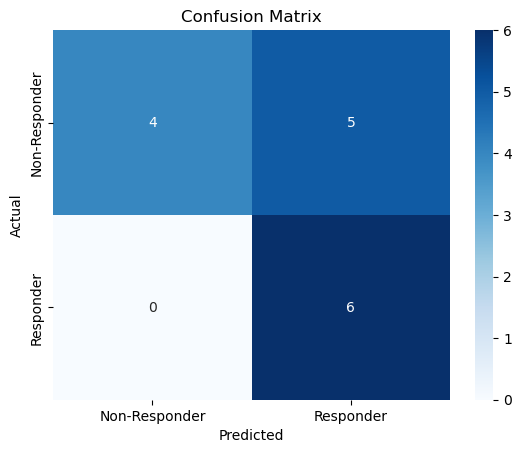

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Prepare the data
# Cluster labels as features
cluster_df = pd.DataFrame({
        'clusters': [pat.cluster for pat in patients_resp]
    })

X = pd.get_dummies(cluster_df, columns=['clusters'])  # One-hot encoding for categorical features
y = np.array([pat.response for pat in patients_resp])  # Treatment response as target


# Define the baseline (majority class)
majority_class = np.argmax(np.bincount(y.astype(int)))
baseline_accuracy = np.mean(y == majority_class)
print(f"Baseline Accuracy (Majority Class): {baseline_accuracy:.2f}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

clus_test = y_test
clus_pred = y_pred
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Responder', 'Responder'], yticklabels=['Non-Responder', 'Responder'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Only DMD arrays as features


Baseline Model Accuracy (Without Clusters): 0.60
Model Accuracy: 0.67

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.33      0.50         9
        True       0.50      1.00      0.67         6

    accuracy                           0.60        15
   macro avg       0.75      0.67      0.58        15
weighted avg       0.80      0.60      0.57        15



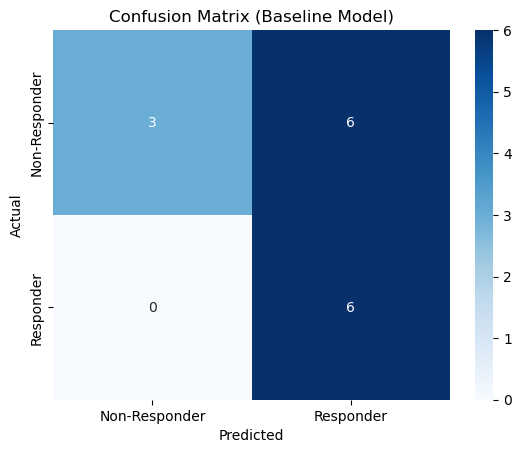

In [83]:
# Flatten the padded arrays
X_baseline = np.array([pat.array.flatten() for pat in patients_resp])  # Flattened EEG data
y_baseline = np.array([pat.response for pat in patients_resp])  # Treatment response as target

# Split the data into training and testing sets
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_baseline, y_baseline, test_size=0.3, random_state=42)

# Train a baseline classifier
clf_baseline = RandomForestClassifier(random_state=42)
clf_baseline.fit(X_train_base, y_train_base)

# Make predictions
y_pred_base = clf_baseline.predict(X_test_base)

# Evaluate the baseline model
accuracy = accuracy_score(y_test, y_pred)
accuracy_base = accuracy_score(y_test_base, y_pred_base)
print(f"Baseline Model Accuracy (Without Clusters): {accuracy_base:.2f}")
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test_base, y_pred_base))
dmd_pred = y_pred_base
dmd_test = y_test_base

# Confusion Matrix for Baseline Model
conf_matrix_base = confusion_matrix(y_test_base, y_pred_base)
sns.heatmap(conf_matrix_base, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Responder', 'Responder'], yticklabels=['Non-Responder', 'Responder'])
plt.title('Confusion Matrix (Baseline Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [84]:
print("\nOnly Clusters Report:\n", classification_report(clus_test, clus_pred))
print("\nOnly DMD Arrays Report:\n", classification_report(dmd_test, dmd_pred))
print("\nBoth Clusters and DMD Arrays Report:\n", classification_report(clus_dmd_test, clus_dmd_pred))


Only Clusters Report:
               precision    recall  f1-score   support

       False       1.00      0.44      0.62         9
        True       0.55      1.00      0.71         6

    accuracy                           0.67        15
   macro avg       0.77      0.72      0.66        15
weighted avg       0.82      0.67      0.65        15


Only DMD Arrays Report:
               precision    recall  f1-score   support

       False       1.00      0.33      0.50         9
        True       0.50      1.00      0.67         6

    accuracy                           0.60        15
   macro avg       0.75      0.67      0.58        15
weighted avg       0.80      0.60      0.57        15


Both Clusters and DMD Arrays Report:
               precision    recall  f1-score   support

       False       1.00      0.33      0.50         9
        True       0.50      1.00      0.67         6

    accuracy                           0.60        15
   macro avg       0.75      0.67      